# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Jupyter Settings

In [2]:
pd.options.display.max_rows = 200000

# Data Understanding

In [3]:
df = pd.read_csv("Country-data.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<img src="Data_Dictionary.png",width=1000,height=1000>

In [5]:
# Adding % to the column names

df.columns = ['country', 'child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports%      167 non-null float64
health%       167 non-null float64
imports%      167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
df.dtypes

country        object
child_mort    float64
exports%      float64
health%       float64
imports%      float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
# Derived Variable(s)

#df['trade_deficit%'] = df['imports%'] - df['exports%']

# https://www.investopedia.com/terms/t/trade_deficit.asp
# http://dlibra.bg.ajd.czest.pl:8080/Content/448/Pragmata5-89.pdf

In [9]:
# Categorical Variables

cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

cat_cols

['country']

In [10]:
# Numeric Variables

numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

numeric_cols

['child_mort',
 'exports%',
 'health%',
 'imports%',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [11]:
df.describe()

,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Unique Value Counts/Frequencies

In [12]:
# Unique value counts/frequencies of each column to determine if there are any columns with only a single value/all different values

unique_values = pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(df.dtypes)

unique_values

,Unique Value Count,dtype
life_expec,127,float64
total_fer,138,float64
child_mort,139,float64
exports%,147,float64
health%,147,float64
imports%,151,float64
income,156,int64
inflation,156,float64
gdpp,157,int64
country,167,object


In [13]:
# Unique values of all columns

for col in df:
    print('\n################################')
    print('Unique values of ' + str(col))
    print('################################')
    print(pd.Series(df[col].unique()).sort_values(ascending=False))


################################
Unique values of country
################################
166                            Zambia
165                             Yemen
164                           Vietnam
163                         Venezuela
162                           Vanuatu
161                        Uzbekistan
160                           Uruguay
159                     United States
158                    United Kingdom
157              United Arab Emirates
156                           Ukraine
155                            Uganda
154                      Turkmenistan
153                            Turkey
152                           Tunisia
151                             Tonga
150                              Togo
149                       Timor-Leste
148                          Thailand
147                          Tanzania
146                        Tajikistan
145                       Switzerland
144                            Sweden
143                          Surin

In [14]:
# Frequency Distribution of unique values of all columns

for col in df:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of country
############################################
Armenia                           1
Congo, Rep.                       1
Uruguay                           1
Luxembourg                        1
Micronesia, Fed. Sts.             1
Egypt                             1
Lithuania                         1
Saudi Arabia                      1
Tunisia                           1
Ghana                             1
Japan                             1
Singapore                         1
Benin                             1
Belarus                           1
Italy                             1
Czech Republic                    1
Chile                             1
United Arab Emirates              1
Morocco                           1
Cape Verde                        1
Central African Republic          1
Norway                            1
Paraguay                          1
Bahrain                           1
Yemen   

## Min Max Values

In [15]:
# Check if all the values of the variables are in the same scale

numeric_cols = [cname for cname in df.columns if 
                                df[cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df[numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df[numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,208.00,2.6000
exports%,200.00,0.1090
health%,17.90,1.8100
imports%,174.00,0.0659
income,125000.00,609.0000
inflation,104.00,-4.2100
life_expec,82.80,32.1000
total_fer,7.49,1.1500
gdpp,105000.00,231.0000


Looks like the data is not skewed and scale seems to be ok.

# Filtering Data

In [16]:
df.duplicated().value_counts()

False    167
dtype: int64

There are no duplicates in the data set.

# Missing Values

In [17]:
# If any missing values in the data set

df.isnull().values.any()

False

There are no missing values in the data set.

# Outlier Treatment

In [18]:
def univariate_continuos(df):
    
    numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    
    for col in numeric_cols:
    
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

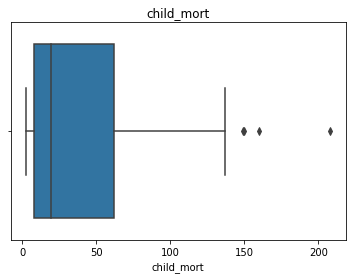

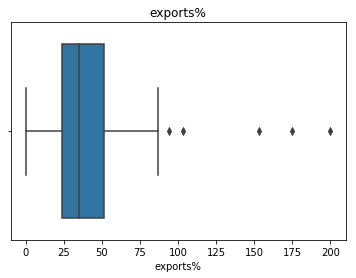

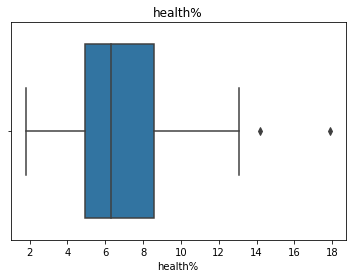

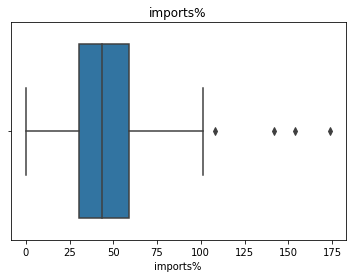

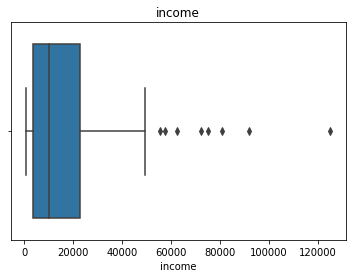

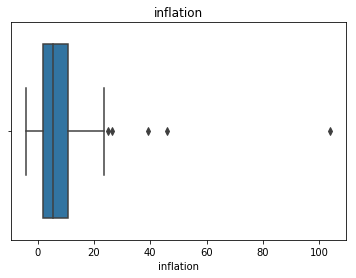

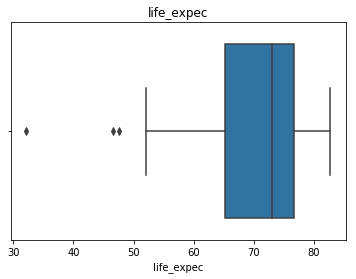

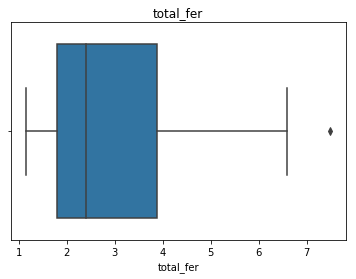

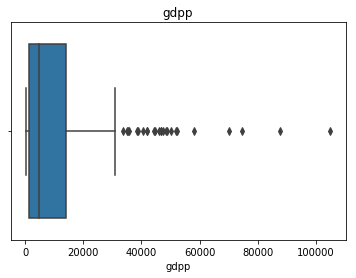

In [19]:
univariate_continuos(df)

In [20]:
def outlier_treatment(df, col):

    print('#########################')
    print(col)
    print('#########################')
    
    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_low  = Q1-1.5*IQR
    print('Fence Low is => ' + str(fence_low))

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))

    df.loc[(df[col] > fence_high), col] = fence_high
    df.loc[(df[col] < fence_low), col] = fence_low
    
    print('\n')
    
    return df

Using capping technique to cap the values greater/lesser than (1.5 * IQR). This won't effect the formation of clusters as the outliers are most likey to fall in the same cluster as the values used for capping.

In [21]:
df = outlier_treatment(df, 'child_mort')
df = outlier_treatment(df, 'exports%')
df = outlier_treatment(df, 'health%')
df = outlier_treatment(df, 'imports%')
df = outlier_treatment(df, 'income')
df = outlier_treatment(df, 'inflation')
df = outlier_treatment(df, 'life_expec')
df = outlier_treatment(df, 'total_fer')
df = outlier_treatment(df, 'gdpp')

#########################
child_mort
#########################
Q1 is => 8.25
Q3 is => 62.1
Fence Low is => -72.525
Fence High is => 142.875


#########################
exports%
#########################
Q1 is => 23.8
Q3 is => 51.349999999999994
Fence Low is => -17.524999999999988
Fence High is => 92.67499999999998


#########################
health%
#########################
Q1 is => 4.92
Q3 is => 8.600000000000001
Fence Low is => -0.6000000000000023
Fence High is => 14.120000000000005


#########################
imports%
#########################
Q1 is => 30.2
Q3 is => 58.75
Fence Low is => -12.625000000000004
Fence High is => 101.575


#########################
income
#########################
Q1 is => 3355.0
Q3 is => 22800.0
Fence Low is => -25812.5
Fence High is => 51967.5


#########################
inflation
#########################
Q1 is => 1.81
Q3 is => 10.75
Fence Low is => -11.6
Fence High is => 24.16


#########################
life_expec
#########################
Q1 is => 

In [22]:
# Max and Min Values Post Outlier Treatment

numeric_cols = [cname for cname in df.columns if 
                                df[cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df[numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df[numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,142.8750,2.6000
exports%,92.6750,0.1090
health%,14.1200,1.8100
imports%,101.5750,0.0659
income,51967.5000,609.0000
inflation,24.1600,-4.2100
life_expec,82.8000,48.0500
total_fer,7.0075,1.1500
gdpp,33130.0000,231.0000


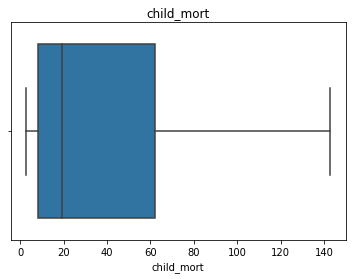

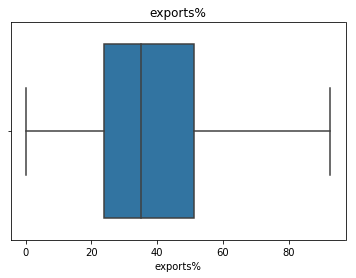

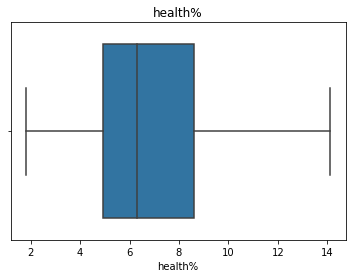

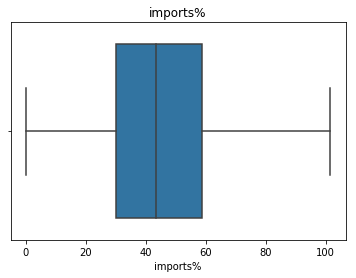

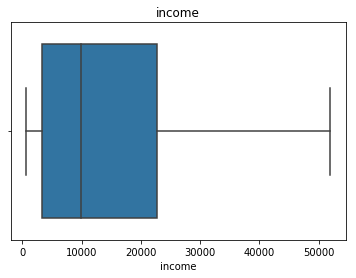

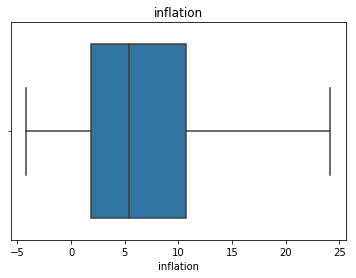

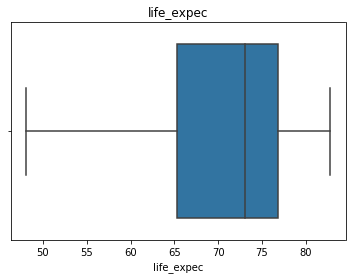

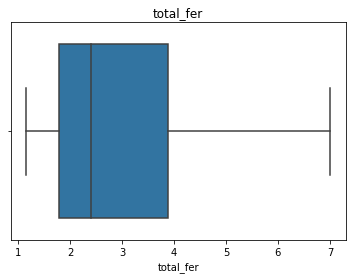

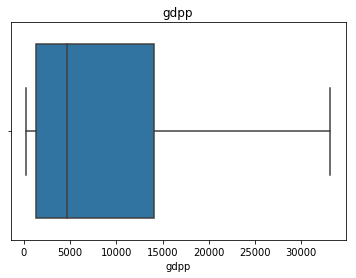

In [23]:
univariate_continuos(df)

In [24]:
df.isnull().sum(axis=0)

country       0
child_mort    0
exports%      0
health%       0
imports%      0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Scaling Data

In [25]:
df_norm = df.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df_norm)

In [26]:
df_norm = pd.DataFrame(df_norm)

In [27]:
df_norm.columns = ['child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [28]:
df_norm.head()

,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [29]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_norm.columns if 
                                df_norm[cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_norm[numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_norm[numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,2.744123,-0.915732
exports%,2.501781,-1.856841
health%,2.754565,-1.873076
imports%,2.747480,-2.258436
income,2.377449,-1.009958
inflation,2.557260,-1.686656
life_expec,1.428299,-2.661389
total_fer,2.706389,-1.195879
gdpp,1.967546,-0.874154


Seems scaling has been done correctly.

# Collinearity Check

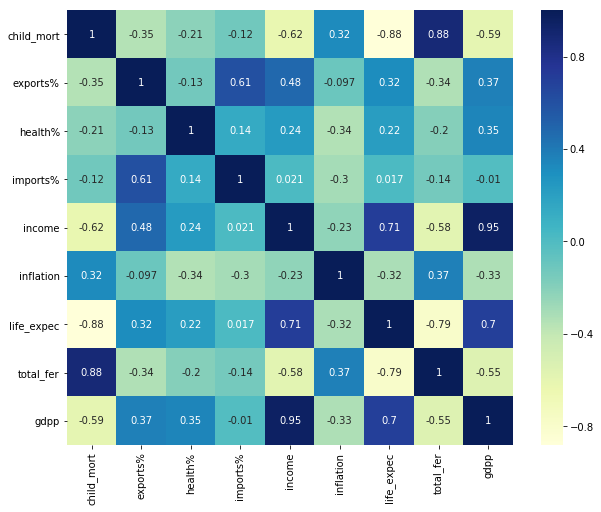

In [30]:
# Checking Correaltions between variables

plt.figure(figsize=(10, 8))
sns.heatmap(df_norm.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can see below combination of variables are highly correlated:

1) child_mort with income, life_expec and total_fer
2) exports% with imports%
3) income with life_expec and gdpp
4) life_expec with total_fer

life_expec, health ,income and inflation can be considered as the ones which can define the data well. We will use these variables to explain the properties of our clusters.

# PCA

In [31]:
# Improting the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [32]:
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [33]:
len(pca.components_)

9

In [34]:
pca.components_

array([[-0.41944273,  0.24261558,  0.16500907,  0.10420163,  0.40941528,
        -0.2225263 ,  0.42682192, -0.40453015,  0.4051655 ],
       [ 0.07334822,  0.58841114, -0.14688671,  0.74003398, -0.09869075,
        -0.12425025, -0.16188848,  0.04426836, -0.16068855],
       [-0.08450172,  0.31511283, -0.68295534, -0.22321331,  0.17709816,
         0.57516657,  0.10807604, -0.04597193,  0.03656493],
       [ 0.38752364,  0.21044073,  0.31288648, -0.01700475,  0.44799707,
         0.2127039 , -0.20810598,  0.43950031,  0.47427847],
       [-0.22293271,  0.00638424,  0.54492556,  0.21137615, -0.14599624,
         0.72370141,  0.07904136, -0.14305882, -0.19200134],
       [ 0.13706601,  0.16969542,  0.09301381, -0.22571332,  0.09423655,
        -0.00769757, -0.66016162, -0.66927305, -0.01177868],
       [ 0.052     , -0.64519755, -0.27864188,  0.54266437,  0.2346111 ,
         0.1680494 , -0.16241328, -0.18782768,  0.25288322],
       [-0.76720537, -0.02395508, -0.02886243, -0.03479837,  0

In [35]:
# Taking 2 PCs and showing their values for each of the original varaibles

colnames = list(df_norm.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419443,0.073348,child_mort
1,0.242616,0.588411,exports%
2,0.165009,-0.146887,health%
3,0.104202,0.740034,imports%
4,0.409415,-0.098691,income
5,-0.222526,-0.124250,inflation
6,0.426822,-0.161888,life_expec
7,-0.404530,0.044268,total_fer
8,0.405166,-0.160689,gdpp


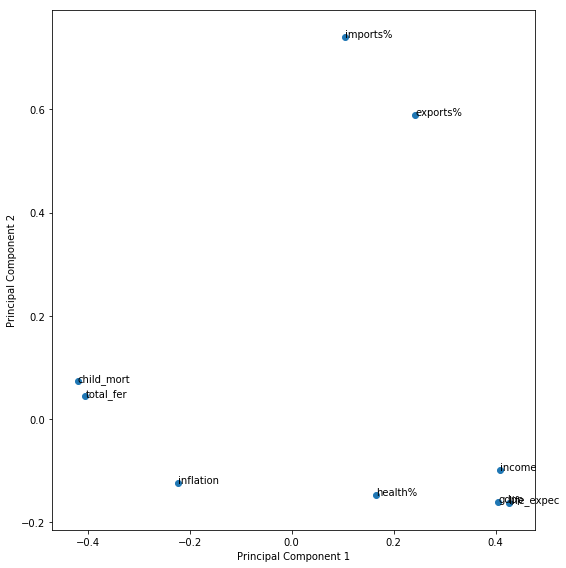

In [36]:
# Plotting 2 PCs againt each other

%matplotlib inline

fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

For PC1, the values of income, life_expec & gdpp are high. It seems PC1 captures details of countries which are well off.

For PC2, the values of imports, exports are high.

## Scree Plot 

In [37]:
pca.explained_variance_ratio_

array([ 0.48892383,  0.16452848,  0.13756787,  0.09504553,  0.0650032 ,
        0.02011842,  0.01655859,  0.00899467,  0.00325941])

As expected, the variance explained by each PC decreases starting from 1 to 9. It makes sense to take the first 5 components but let's also plot the screeplot and validate this.

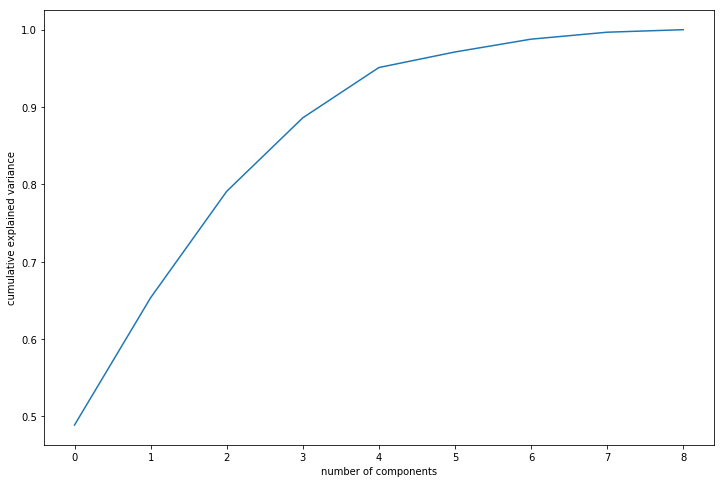

In [38]:
# Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the screeplot, it is clear that the variance kind of saturates after 5. So, let's take the 5 PCs into consideration.

In [39]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

## Correlation Matrix

In [40]:
df_pca = pca_final.fit_transform(df_norm)

In [41]:
# Creating correlation matrix for the principal components

corrmat = np.corrcoef(df_pca.transpose())

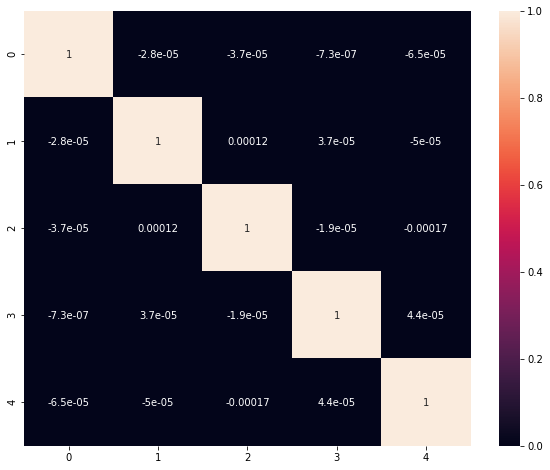

In [42]:
# Plotting the correlation matrix
%matplotlib inline

plt.figure(figsize = (10,8))
sns.heatmap(corrmat,annot = True)

In [43]:
# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

# we see that correlations are indeed very close to 0

max corr: 0.000122200884666 , min corr:  -0.000173331813814


In [44]:
df_pca = pd.DataFrame(df_pca)

In [45]:
df_pca.head()

,0,1,2,3,4
0,-3.177710,-0.251717,1.012465,0.778252,-0.019275
1,0.434936,-0.218673,0.293355,-1.391516,0.153447
2,-0.416816,-0.612987,-1.637990,-0.615371,0.540217
3,-3.306485,1.067652,-2.150695,1.698928,0.167330
4,1.253325,0.547657,0.137853,-0.717170,-0.396180


In [46]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
0    167 non-null float64
1    167 non-null float64
2    167 non-null float64
3    167 non-null float64
4    167 non-null float64
dtypes: float64(5)
memory usage: 6.6 KB


# Hopkins Statistic

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
hopkins(df_pca)

0.73476106601690028

Hopkins test shows that the data has a tendency to form clusters.

# Silhouette Analysis

In [49]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

In [50]:
pd.DataFrame(sse_)

,0,1
0,2,0.304000
1,3,0.296355
2,4,0.263269
3,5,0.271218
4,6,0.291091
5,7,0.286682
6,8,0.276872
7,9,0.269024
8,10,0.267736
9,11,0.261036


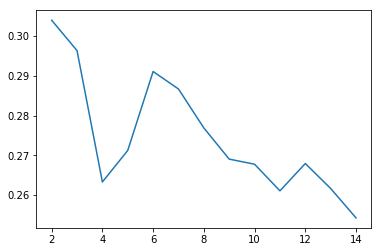

In [51]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

It seems 3 & 6 clusters have a decent Silhoutte metric value.

# Sum of Squared Distances

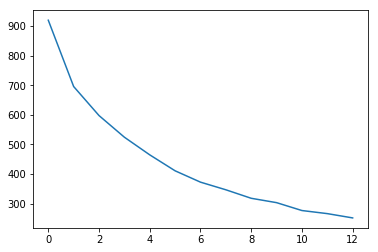

In [52]:
# sum of squared distances
ssd = []
for num_clusters in list(range(2,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

The elbow curve clearly tells the same thing that the Silhoutte score also said where we can see elbows at clusters at 3 and 6. Let's see if this can be validated with Hierarchical Clustering.

# Hierarchical Clustering

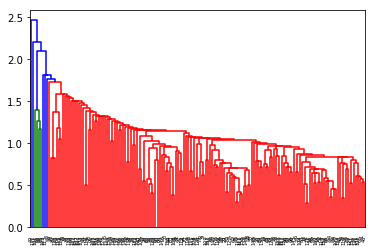

In [53]:
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

As expected, single linkage will not yield the best results.

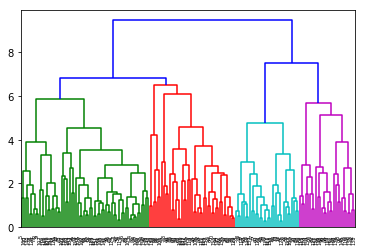

In [54]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

We can see Hierarchical clustering shows there are 4 clusters in the data set. Let's go with 4 and see how it pans out.

In [55]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

## Summarizing PCA Variables on Clusters

In [56]:
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'ClusterID']

In [57]:
hc_PCA1 = pd.DataFrame(df_pca_hc.groupby(["ClusterID"]).PCA1.mean())
hc_PCA2 = pd.DataFrame(df_pca_hc.groupby(["ClusterID"]).PCA2.mean())
hc_PCA3 = pd.DataFrame(df_pca_hc.groupby(["ClusterID"]).PCA3.mean())
hc_PCA4 = pd.DataFrame(df_pca_hc.groupby(["ClusterID"]).PCA4.mean())
hc_PCA5 = pd.DataFrame(df_pca_hc.groupby(["ClusterID"]).PCA5.mean())

In [58]:
df_pca_final_hc = pd.concat([pd.Series([0,1,2,3]), hc_PCA1, hc_PCA2, hc_PCA3, hc_PCA4, hc_PCA5], axis=1)
df_pca_final_hc.columns = ['ClusterID', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
df_pca_final_hc.head()

,ClusterID,PCA1,PCA2,PCA3,PCA4,PCA5
0,0,-2.632249,0.165047,0.341653,0.723729,-0.096487
1,1,-0.308284,0.022987,-0.275475,-0.777434,0.148785
2,2,2.041934,-1.263027,0.671628,0.209241,0.004300
3,3,2.413394,1.137452,-0.662598,0.426417,-0.196817


## Visualizing Clusters on PCA Variables

In [59]:
# Plotting barplot

def visualize_pc(df, cluster):
    for col in ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']:
        sns.barplot(x=df[cluster], y=df[col])
        plt.show()

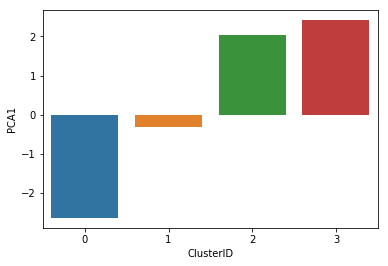

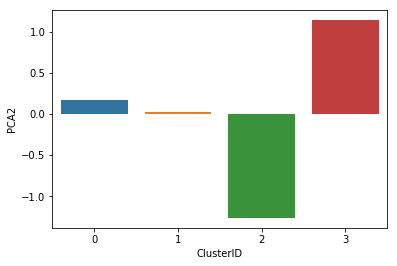

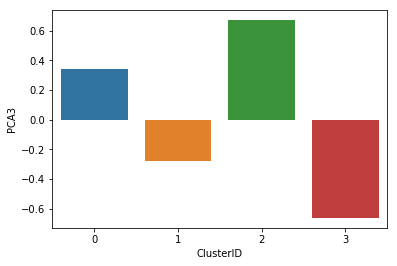

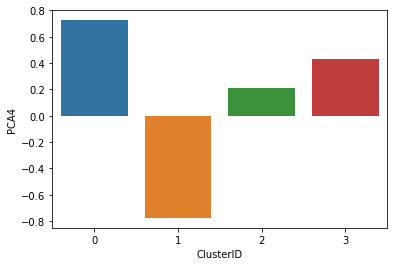

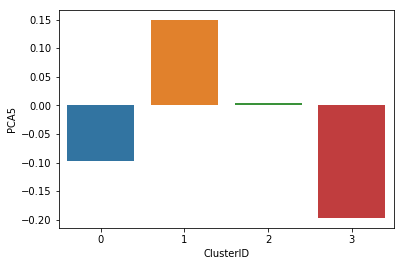

In [60]:
visualize_pc(df_pca_final_hc, 'ClusterID')

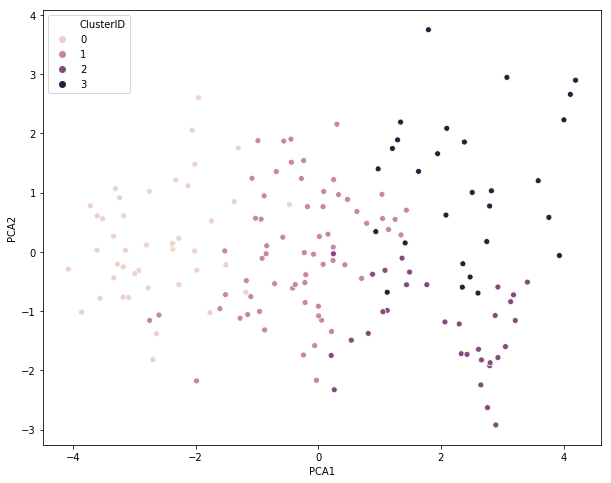

In [61]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="PCA1", y="PCA2", hue="ClusterID", data=df_pca_hc)

| Cluster | PCA 1 | PCA 2  |
|----|---|
| 0 | Low | Mid | 
| 1 | Mid | Mid |
| 2 | Mid to High | Mid to High |
| 3 | High | Mid to High |

Intuitively, this doens't feel like the best way to cluster this data set.

## Summarizing Original Variables on Clusters

In [62]:
df_hc = pd.concat([df, clusterCut], axis=1)
df_hc.columns = ['country', 'child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [63]:
hc_child_mort = pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
hc_exports_percent = pd.DataFrame(df_hc.groupby(["ClusterID"])['exports%'].mean())
hc_health_percent = pd.DataFrame(df_hc.groupby(["ClusterID"])['health%'].mean())
hc_imports_percent = pd.DataFrame(df_hc.groupby(["ClusterID"])['imports%'].mean())
hc_income = pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
hc_inflation = pd.DataFrame(df_hc.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer = pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp = pd.DataFrame(df_hc.groupby(["ClusterID"]).gdpp.mean())

In [64]:
df_final_hc = pd.concat([pd.Series([0,1,2,3]), hc_child_mort, hc_exports_percent, hc_health_percent, hc_imports_percent, hc_income, hc_inflation, hc_life_expec, hc_total_fer, hc_gdpp], axis=1)
df_final_hc.columns = ['ClusterID', 'child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df_final_hc

,ClusterID,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp
0,0,93.511628,28.942326,6.651860,43.753488,3452.860465,10.098256,59.426744,5.089709,1759.302326
1,1,28.225000,36.159047,5.693125,45.501030,9391.250000,8.210266,70.900000,2.552187,4450.062500
2,2,7.456250,31.731250,9.624063,33.531250,29066.171875,2.776156,79.040625,1.796875,23496.250000
3,3,8.200000,72.488393,6.285714,64.017857,34974.017857,4.690964,77.807143,1.861786,22011.785714


## Visualizing Clusters on Original Variables

In [65]:
# Plotting barplot

def visualize_orig(df, cluster):
    for col in ['child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']:
        sns.barplot(x=df[cluster], y=df[col])
        plt.show()

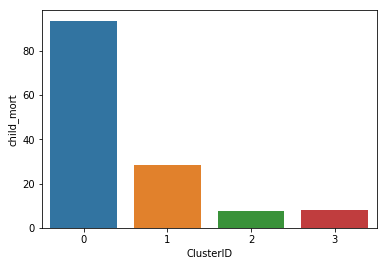

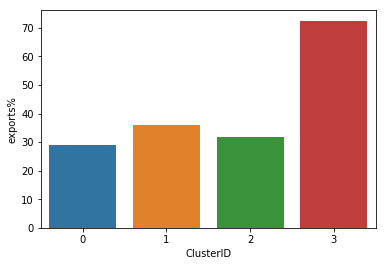

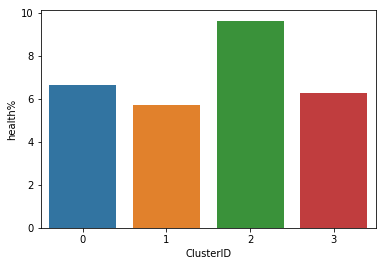

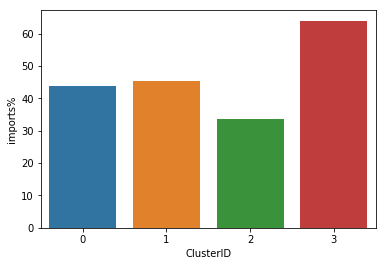

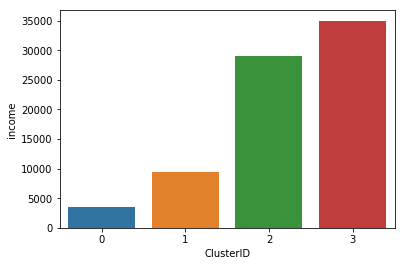

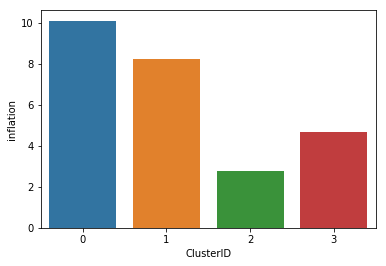

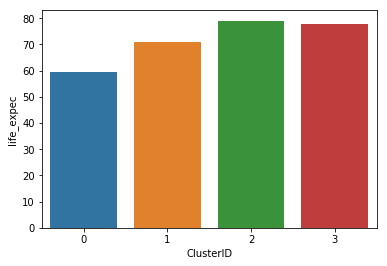

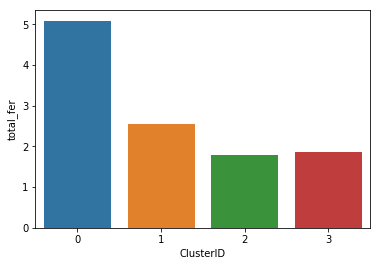

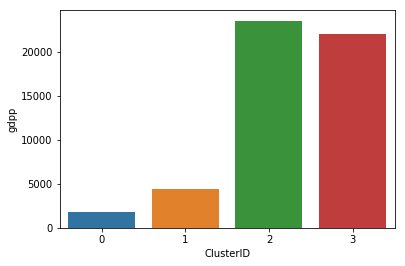

In [66]:
visualize_orig(df_final_hc, 'ClusterID')

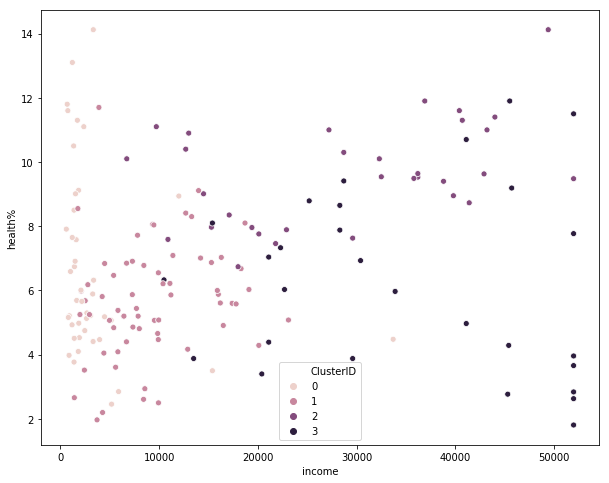

In [67]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="income", y="health%", hue="ClusterID", data=df_hc)

| Cluster | Income Range | Health% |
|----|---|
| 0 | Low | Low to High | 
| 1 | Mid | Mid |
| 2 | Mid to High | Mid to High |
| 3 | Mid to High | Low to High |

Intuitively, this doens't feel like the best way to cluster this data set.

## Intepreting Clusters on Original Variables

In [68]:
col = 'ClusterID'

print('\nFrequency distribution of unique values => \n\n'+ str(df_hc[col].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

1    64
0    43
2    32
3    28
Name: ClusterID, dtype: int64


In [69]:
df_hc.loc[df_hc['ClusterID'] == 0]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.200,10.00,7.58,44.9,1610.0,9.440,56.20,5.8200,553.0,0
3,Angola,119.000,62.30,2.85,42.9,5900.0,22.400,60.10,6.1600,3530.0,0
17,Benin,111.000,23.80,4.10,37.2,1820.0,0.885,61.80,5.3600,758.0,0
25,Burkina Faso,116.000,19.20,6.74,29.6,1430.0,6.810,57.90,5.8700,575.0,0
26,Burundi,93.600,8.92,11.60,39.2,764.0,12.300,57.70,6.2600,231.0,0
28,Cameroon,108.000,22.20,5.13,27.0,2660.0,1.910,57.30,5.1100,1310.0,0
31,Central African Republic,142.875,11.80,3.98,26.5,888.0,2.010,48.05,5.2100,446.0,0
32,Chad,142.875,36.80,4.53,43.5,1930.0,6.390,56.50,6.5900,897.0,0
36,Comoros,88.200,16.50,4.51,51.7,1410.0,3.870,65.90,4.7500,769.0,0
37,"Congo, Dem. Rep.",116.000,41.10,7.91,49.6,609.0,20.800,57.50,6.5400,334.0,0


In [70]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_hc.loc[df_hc['ClusterID'] == 0].columns if 
                                df_hc.loc[df_hc['ClusterID'] == 0][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 0][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 0][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,142.8750,40.000
exports%,85.8000,2.200
health%,14.1200,2.460
imports%,101.0000,17.200
income,33700.0000,609.000
inflation,24.1600,0.885
life_expec,71.1000,48.050
total_fer,7.0075,2.590
gdpp,17100.0000,231.000
ClusterID,0.0000,0.000


In [71]:
df_hc.loc[df_hc['ClusterID'] == 1]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.000,6.55,48.6000,9930.0,4.490,76.3,1.65,4090.0,1
2,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.100,76.5,2.89,4460.0,1
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100.0,1.440,76.8,2.13,12200.0,1
5,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.900,75.8,2.37,10300.0,1
6,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.770,73.3,1.69,3220.0,1
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.800,69.1,1.92,5840.0,1
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.140,70.4,2.33,758.0,1
14,Belarus,5.5,51.400,5.61,64.5000,16200.0,15.100,70.4,1.49,6030.0,1
16,Belize,18.8,58.200,5.20,57.5000,7880.0,1.140,71.4,2.71,4340.0,1
18,Bhutan,42.7,42.500,5.20,70.7000,6420.0,5.990,72.1,2.38,2180.0,1


In [72]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_hc.loc[df_hc['ClusterID'] == 1].columns if 
                                df_hc.loc[df_hc['ClusterID'] == 1][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 1][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 1][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,92.10,5.5000
exports%,76.30,0.1090
health%,11.70,1.9700
imports%,81.70,0.0659
income,23100.00,1420.0000
inflation,24.16,-0.8120
life_expec,79.80,57.1000
total_fer,4.61,1.2700
gdpp,13500.00,482.0000
ClusterID,1.00,1.0000


In [73]:
df_hc.loc[df_hc['ClusterID'] == 2]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130.0,2
8,Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130.0,2
10,Bahamas,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,2
13,Barbados,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,2
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720.0,1.400,76.8,1.31,4610.0,2
22,Brazil,19.8,10.7,9.01,11.8,14500.0,8.410,74.2,1.80,11200.0,2
29,Canada,5.6,29.1,11.30,31.0,40700.0,2.870,81.3,1.63,33130.0,2
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,2
35,Colombia,18.6,15.9,7.59,17.8,10900.0,3.860,76.4,2.01,6250.0,2
39,Costa Rica,10.2,33.2,10.90,35.0,13000.0,6.570,80.4,1.92,8200.0,2


In [74]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_hc.loc[df_hc['ClusterID'] == 2].columns if 
                                df_hc.loc[df_hc['ClusterID'] == 2][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 2][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 2][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,19.80,2.60
exports%,53.40,10.70
health%,14.12,6.74
imports%,52.80,11.80
income,51967.50,6730.00
inflation,8.96,-1.90
life_expec,82.80,72.80
total_fer,3.03,1.31
gdpp,33130.00,2960.00
ClusterID,2.00,2.00


In [75]:
df_hc.loc[df_hc['ClusterID'] == 3]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700.0,3
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130.0,3
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130.0,3
42,Cyprus,3.6,50.200,5.97,57.500,33900.0,2.010,79.9,1.42,30800.0,3
43,Czech Republic,3.4,66.000,7.88,62.900,28300.0,-1.430,77.5,1.51,19800.0,3
51,Estonia,4.5,75.100,6.03,68.700,22700.0,1.740,76.0,1.72,14600.0,3
67,Hungary,6.0,81.800,7.33,76.500,22300.0,2.330,74.5,1.25,13100.0,3
73,Ireland,4.2,92.675,9.19,86.500,45700.0,-3.220,80.4,2.05,33130.0,3
82,Kuwait,10.8,66.700,2.63,30.400,51967.5,11.200,78.2,2.21,33130.0,3
89,Libya,16.6,65.600,3.88,42.100,29600.0,14.200,76.1,2.41,12100.0,3


In [76]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_hc.loc[df_hc['ClusterID'] == 3].columns if 
                                df_hc.loc[df_hc['ClusterID'] == 3][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 3][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_hc.loc[df_hc['ClusterID'] == 3][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,19.700,2.80
exports%,92.675,49.40
health%,11.900,1.81
imports%,101.575,23.80
income,51967.500,10500.00
inflation,17.200,-4.21
life_expec,82.700,73.20
total_fer,2.960,1.15
gdpp,33130.000,5080.00
ClusterID,3.000,3.00


## Clusters & Countries

In [77]:
df_hc.loc[(df_hc['ClusterID'] == 0)].country

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
101       Micronesia, Fed. Sts.
106                  Mozambique
112                       Niger
113     

In [78]:
df_hc.loc[(df_hc['ClusterID'] == 1)].country

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
21                           Botswana
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
34                              China
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48                        El Salvador
50                            Eritrea
52                               Fiji
61                            Grenada
62                          Guatemala
65                             Guyana
69                              India
70          

In [79]:
df_hc.loc[(df_hc['ClusterID'] == 2)].country

7                   Australia
8                     Austria
10                    Bahamas
13                   Barbados
20     Bosnia and Herzegovina
22                     Brazil
29                     Canada
33                      Chile
35                   Colombia
39                 Costa Rica
41                    Croatia
44                    Denmark
53                    Finland
54                     France
57                    Georgia
58                    Germany
60                     Greece
68                    Iceland
74                     Israel
75                      Italy
77                      Japan
111               New Zealand
114                    Norway
121                    Poland
122                  Portugal
130                    Serbia
139                     Spain
144                    Sweden
153                    Turkey
158            United Kingdom
159             United States
160                   Uruguay
Name: country, dtype: object

In [80]:
df_hc.loc[(df_hc['ClusterID'] == 3)].country

11                  Bahrain
15                  Belgium
23                   Brunei
42                   Cyprus
43           Czech Republic
51                  Estonia
67                  Hungary
73                  Ireland
82                   Kuwait
89                    Libya
90                Lithuania
91               Luxembourg
95                 Malaysia
96                 Maldives
98                    Malta
110             Netherlands
115                    Oman
117                  Panama
123                   Qatar
128            Saudi Arabia
131              Seychelles
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
145             Switzerland
148                Thailand
157    United Arab Emirates
Name: country, dtype: object

# Choice of Clusters for K Means

Even though Hierarchical clustering suggests K = 4, we saw that the clusters are not tightly packed.

We will take K = 3 as suggested by SSD/Scree Plots and also K = 6 to compare and evaluate K = 3.

Also, it doesn't make business sense to have clusters more than 6 and less than 3 as no actions can be taken if the clusters is not in this range.

# K Means with K = 6

In [81]:
model_clus6 = KMeans(n_clusters = 6, max_iter=50)
model_clus6.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Summarizing PCA Variables on Clusters

In [82]:
df_pca_km6 = pd.concat([df_pca, pd.Series(model_clus6.labels_)], axis=1)
df_pca_km6.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'ClusterID']

In [83]:
km6_PCA1 = pd.DataFrame(df_pca_km6.groupby(["ClusterID"]).PCA1.mean())
km6_PCA2 = pd.DataFrame(df_pca_km6.groupby(["ClusterID"]).PCA2.mean())
km6_PCA3 = pd.DataFrame(df_pca_km6.groupby(["ClusterID"]).PCA3.mean())
km6_PCA4 = pd.DataFrame(df_pca_km6.groupby(["ClusterID"]).PCA4.mean())
km6_PCA5 = pd.DataFrame(df_pca_km6.groupby(["ClusterID"]).PCA5.mean())

In [84]:
df_pca_final_km6 = pd.concat([pd.Series([0,1,2,3,4,5]), km6_PCA1, km6_PCA2, km6_PCA3, km6_PCA4, km6_PCA5], axis=1)
df_pca_final_km6.columns = ['ClusterID', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
df_pca_final_km6

,ClusterID,PCA1,PCA2,PCA3,PCA4,PCA5
0,0,0.367328,-0.018182,0.170740,-0.937624,-0.006941
1,1,-1.342749,-0.608781,-1.107033,-0.159256,0.448494
2,2,2.841163,-1.328635,0.738836,0.843975,-0.196260
3,3,2.356242,1.197202,-0.774370,0.402364,-0.221267
4,4,-0.750184,1.434469,1.155584,-0.095482,0.792935
5,5,-3.010290,0.013056,0.495707,0.745516,-0.483994


## Visualizing Clusters on PCA Variables

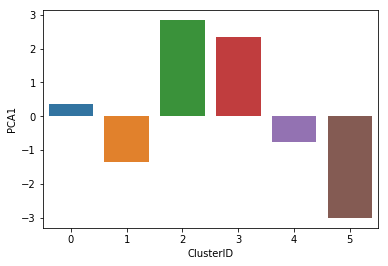

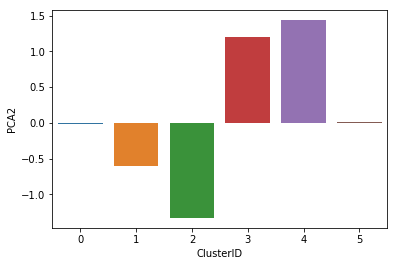

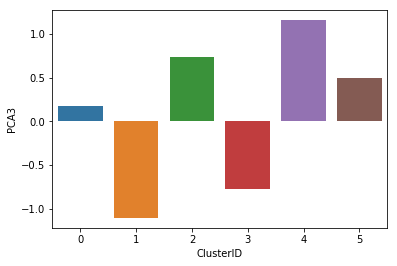

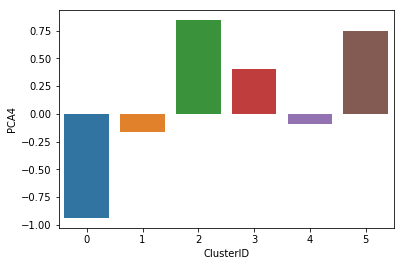

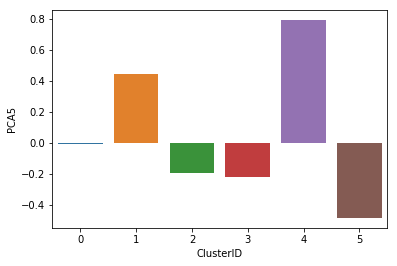

In [85]:
visualize_pc(df_pca_final_km6, 'ClusterID')

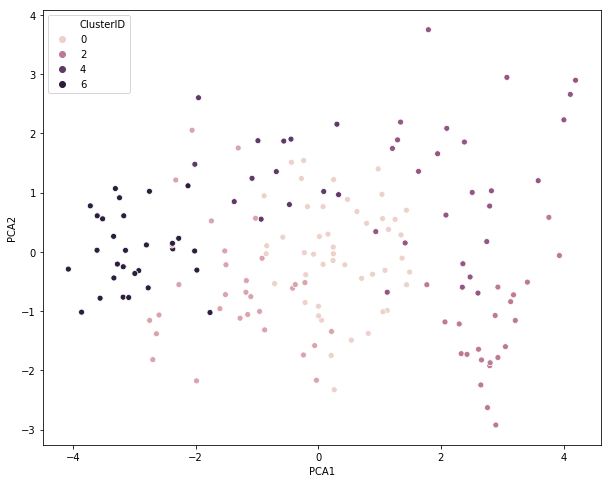

In [86]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="PCA1", y="PCA2", hue="ClusterID", data=df_pca_km6)

Intuitively, this doens't feel like the best way to cluster this data set.

## Summarizing Original Variables on Clusters

In [87]:
df.index = pd.RangeIndex(len(df.index))
df_km_6 = pd.concat([df, pd.Series(model_clus6.labels_)], axis=1)
df_km_6.columns = ['country', 'child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

km_child_mort = pd.DataFrame(df_km_6.groupby(["ClusterID"]).child_mort.mean())
km_exports_percent = pd.DataFrame(df_km_6.groupby(["ClusterID"])['exports%'].mean())
km_health_percent = pd.DataFrame(df_km_6.groupby(["ClusterID"])['health%'].mean())
km_imports_percent = pd.DataFrame(df_km_6.groupby(["ClusterID"])['imports%'].mean())
km_income = pd.DataFrame(df_km_6.groupby(["ClusterID"]).income.mean())
km_inflation = pd.DataFrame(df_km_6.groupby(["ClusterID"]).inflation.mean())
km_life_expec = pd.DataFrame(df_km_6.groupby(["ClusterID"]).life_expec.mean())
km_total_fer = pd.DataFrame(df_km_6.groupby(["ClusterID"]).total_fer.mean())
km_gdpp = pd.DataFrame(df_km_6.groupby(["ClusterID"]).gdpp.mean())

In [88]:
df_km_6_final = pd.concat([pd.Series([0,1,2,3,4,5]), km_child_mort, km_exports_percent, km_health_percent, km_imports_percent, km_income, km_inflation, km_life_expec, km_total_fer, km_gdpp], axis=1)
df_km_6_final.columns = ["ClusterID", 'child_mort', 'exports%', 'health%', 'imports%', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df_km_6_final

,ClusterID,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp
0,0,18.457447,36.995745,6.548085,46.536170,11473.404255,4.384234,73.842553,2.165106,6310.212766
1,1,49.245161,31.234806,4.918387,31.221481,9300.967742,15.868710,67.851613,3.326452,4235.096774
2,2,4.722727,36.018182,10.274091,34.645455,38560.681818,1.438636,80.631818,1.800000,31905.000000
3,3,8.228000,73.087000,5.948800,64.592000,34732.200000,5.044080,77.564000,1.890800,21799.600000
4,4,46.269231,42.507692,8.905385,76.592308,4670.000000,6.516154,63.926923,3.219231,2307.923077
5,5,103.117241,24.983448,6.331379,39.006897,1861.137931,8.255690,58.027586,5.456121,823.896552


## Visualizing Clusters on Original Variables

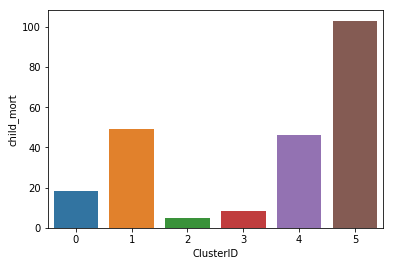

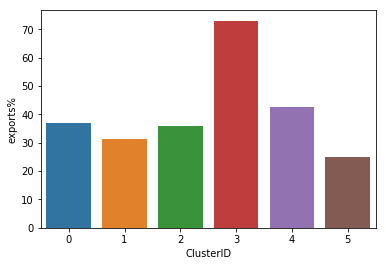

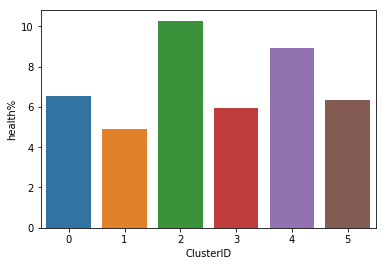

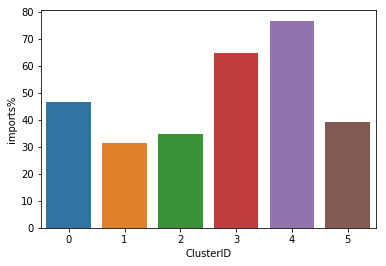

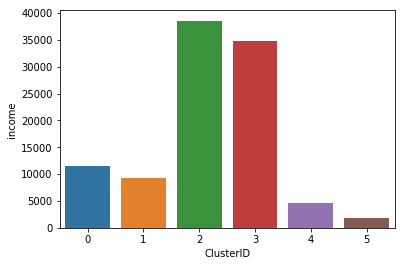

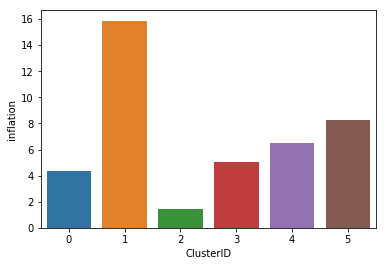

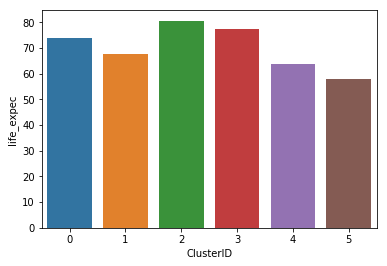

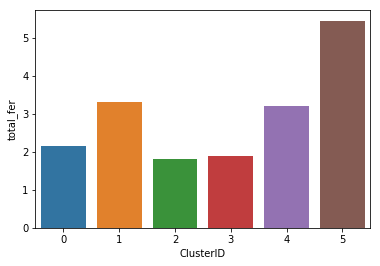

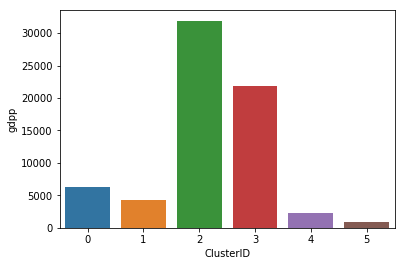

In [89]:
visualize_orig(df_km_6_final, 'ClusterID')

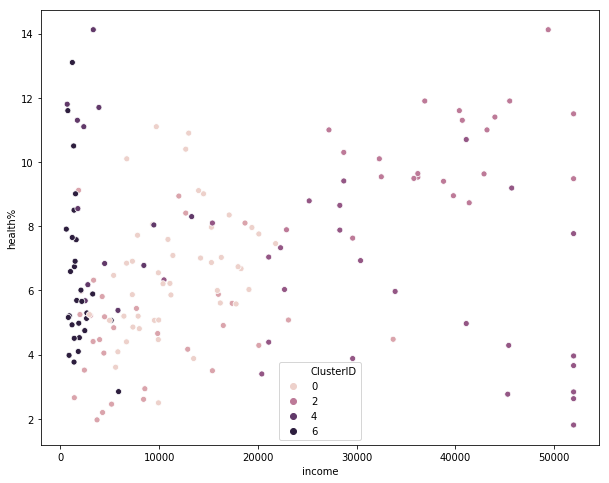

In [90]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="income", y="health%", hue="ClusterID", data=df_km_6)

| Cluster | Income Range | Health% |
|----|---|
| 0 | Low | Low to Mid | 
| 2 | Low to Mid | Mid to High |
| 4 | Mid to High | Mid |
| 6 | Mid to High | High |

Intuitively, this doens't feel like the best way to cluster this data set.

## Intepreting Clusters on Original Variables

In [91]:
col = 'ClusterID'

print('\nFrequency distribution of unique values => \n\n'+ str(df_km_6[col].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

0    47
1    31
5    29
3    25
2    22
4    13
Name: ClusterID, dtype: int64


In [92]:
df_km_6.loc[df_km_6['ClusterID'] == 0]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,0
13,Barbados,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0
14,Belarus,5.5,51.4,5.61,64.5,16200.0,15.100,70.4,1.49,6030.0,0
16,Belize,18.8,58.2,5.20,57.5,7880.0,1.140,71.4,2.71,4340.0,0
18,Bhutan,42.7,42.5,5.20,70.7,6420.0,5.990,72.1,2.38,2180.0,0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720.0,1.400,76.8,1.31,4610.0,0
22,Brazil,19.8,10.7,9.01,11.8,14500.0,8.410,74.2,1.80,11200.0,0
24,Bulgaria,10.8,50.2,6.87,53.0,15300.0,1.110,73.9,1.57,6840.0,0


In [93]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_6.loc[df_km_6['ClusterID'] == 0].columns if 
                                df_km_6.loc[df_hc['ClusterID'] == 0][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 0][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 0][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,62.00,5.500
exports%,76.30,10.700
health%,11.10,2.500
imports%,70.70,11.800
income,21800.00,2950.000
inflation,15.10,-0.812
life_expec,80.40,63.000
total_fer,4.34,1.310
gdpp,16000.00,2130.000


In [94]:
df_km_6.loc[df_km_6['ClusterID'] == 1]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.10,76.5,2.89,4460.0,1
5,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.90,75.8,2.37,10300.0,1
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190.0,20.70,60.4,4.95,2740.0,1
47,Egypt,29.1,21.300,4.66,26.6000,9860.0,10.10,70.5,3.19,2600.0,1
49,Equatorial Guinea,111.0,85.800,4.48,58.9000,33700.0,24.16,60.9,5.21,17100.0,1
50,Eritrea,55.2,4.790,2.66,23.3000,1420.0,11.60,61.7,4.61,482.0,1
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1


In [95]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_6.loc[df_km_6['ClusterID'] == 1].columns if 
                                df_km_6.loc[df_hc['ClusterID'] == 1][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 1][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 1][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,111.00,10.0000
exports%,85.80,0.1090
health%,9.12,1.9700
imports%,61.20,0.0659
income,33700.00,1420.0000
inflation,24.16,6.3500
life_expec,76.50,54.3000
total_fer,6.23,1.5700
gdpp,17100.00,482.0000


In [96]:
df_km_6.loc[df_km_6['ClusterID'] == 2]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130.0,2
8,Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130.0,2
10,Bahamas,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,2
29,Canada,5.6,29.1,11.30,31.0,40700.0,2.870,81.3,1.63,33130.0,2
44,Denmark,4.1,50.5,11.40,43.6,44000.0,3.220,79.5,1.87,33130.0,2
53,Finland,3.0,38.7,8.95,37.4,39800.0,0.351,80.0,1.87,33130.0,2
54,France,4.2,26.8,11.90,28.1,36900.0,1.050,81.4,2.03,33130.0,2
58,Germany,4.2,42.3,11.60,37.1,40400.0,0.758,80.1,1.39,33130.0,2
60,Greece,3.9,22.1,10.30,30.7,28700.0,0.673,80.4,1.48,26900.0,2
68,Iceland,2.6,53.4,9.40,43.3,38800.0,5.470,82.0,2.20,33130.0,2


In [97]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_6.loc[df_km_6['ClusterID'] == 2].columns if 
                                df_km_6.loc[df_hc['ClusterID'] == 2][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 2][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 2][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,13.80,2.60
exports%,72.00,12.40
health%,14.12,7.63
imports%,63.60,13.60
income,51967.50,22900.00
inflation,5.95,-1.90
life_expec,82.80,73.80
total_fer,3.03,1.37
gdpp,33130.00,22500.00


In [98]:
df_km_6.loc[df_km_6['ClusterID'] == 3]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700.0,3
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130.0,3
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130.0,3
42,Cyprus,3.6,50.200,5.97,57.500,33900.0,2.010,79.9,1.42,30800.0,3
43,Czech Republic,3.4,66.000,7.88,62.900,28300.0,-1.430,77.5,1.51,19800.0,3
51,Estonia,4.5,75.100,6.03,68.700,22700.0,1.740,76.0,1.72,14600.0,3
67,Hungary,6.0,81.800,7.33,76.500,22300.0,2.330,74.5,1.25,13100.0,3
73,Ireland,4.2,92.675,9.19,86.500,45700.0,-3.220,80.4,2.05,33130.0,3
82,Kuwait,10.8,66.700,2.63,30.400,51967.5,11.200,78.2,2.21,33130.0,3
89,Libya,16.6,65.600,3.88,42.100,29600.0,14.200,76.1,2.41,12100.0,3


In [99]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_6.loc[df_km_6['ClusterID'] == 3].columns if 
                                df_km_6.loc[df_hc['ClusterID'] == 3][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 3][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 3][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,19.700,2.80
exports%,92.675,49.40
health%,10.700,1.81
imports%,101.575,23.80
income,51967.500,10500.00
inflation,17.200,-4.21
life_expec,82.700,73.20
total_fer,2.960,1.15
gdpp,33130.000,7100.00


In [100]:
df_km_6.loc[df_km_6['ClusterID'] == 4]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
21,Botswana,52.5,43.6,8.30,51.3,13300.0,8.92,57.10,2.88,6350.0,4
27,Cambodia,44.4,54.1,5.68,59.5,2520.0,3.12,66.10,2.88,786.0,4
65,Guyana,37.6,51.4,5.38,79.1,5840.0,5.73,65.50,2.65,3040.0,4
78,Jordan,21.1,48.3,8.04,69.0,9470.0,8.43,75.80,3.66,3680.0,4
81,Kiribati,62.7,13.3,11.30,79.9,1730.0,1.52,60.70,3.84,1490.0,4
83,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790.0,10.00,68.50,3.10,880.0,4
87,Lesotho,99.7,39.4,11.10,101.0,2380.0,4.15,48.05,3.30,1170.0,4
88,Liberia,89.3,19.1,11.80,92.6,700.0,5.47,60.80,5.02,327.0,4
101,"Micronesia, Fed. Sts.",40.0,23.5,14.12,81.0,3340.0,3.80,65.40,3.46,2860.0,4
102,Moldova,17.2,39.2,11.70,78.5,3910.0,11.10,69.70,1.27,1630.0,4


In [101]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_6.loc[df_km_6['ClusterID'] == 4].columns if 
                                df_km_6.loc[df_hc['ClusterID'] == 4][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 4][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 4][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,99.70,17.20
exports%,72.00,13.30
health%,14.12,5.38
imports%,101.00,51.30
income,13300.00,700.00
inflation,12.10,1.52
life_expec,75.80,48.05
total_fer,5.02,1.27
gdpp,6350.00,327.00


In [102]:
df_km_6.loc[df_km_6['ClusterID'] == 5]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.200,10.00,7.58,44.9,1610.0,9.440,56.20,5.8200,553.0,5
3,Angola,119.000,62.30,2.85,42.9,5900.0,22.400,60.10,6.1600,3530.0,5
17,Benin,111.000,23.80,4.10,37.2,1820.0,0.885,61.80,5.3600,758.0,5
25,Burkina Faso,116.000,19.20,6.74,29.6,1430.0,6.810,57.90,5.8700,575.0,5
26,Burundi,93.600,8.92,11.60,39.2,764.0,12.300,57.70,6.2600,231.0,5
28,Cameroon,108.000,22.20,5.13,27.0,2660.0,1.910,57.30,5.1100,1310.0,5
31,Central African Republic,142.875,11.80,3.98,26.5,888.0,2.010,48.05,5.2100,446.0,5
32,Chad,142.875,36.80,4.53,43.5,1930.0,6.390,56.50,6.5900,897.0,5
36,Comoros,88.200,16.50,4.51,51.7,1410.0,3.870,65.90,4.7500,769.0,5
37,"Congo, Dem. Rep.",116.000,41.10,7.91,49.6,609.0,20.800,57.50,6.5400,334.0,5


In [103]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_6.loc[df_km_6['ClusterID'] == 5].columns if 
                                df_km_6.loc[df_hc['ClusterID'] == 5][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 5][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_6.loc[df_km_6['ClusterID'] == 5][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,142.8750,62.200
exports%,62.3000,8.920
health%,13.1000,2.850
imports%,64.7000,17.400
income,5900.0000,609.000
inflation,24.1600,0.885
life_expec,65.9000,48.050
total_fer,7.0075,3.330
gdpp,3530.0000,231.000


## Clusters & Countries

In [104]:
df_km_6.loc[(df_km_6['ClusterID'] == 0)].country

1                             Albania
4                 Antigua and Barbuda
6                             Armenia
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
48                        El Salvador
52                               Fiji
57                            Georgia
61                            Grenada
62                          Guatemala
76                            Jamaica
85                             Latvia
86                            Lebanon
92          

In [105]:
df_km_6.loc[(df_km_6['ClusterID'] == 1)].country

2                Algeria
5              Argentina
9             Azerbaijan
12            Bangladesh
19               Bolivia
38           Congo, Rep.
47                 Egypt
49     Equatorial Guinea
50               Eritrea
55                 Gabon
59                 Ghana
69                 India
70             Indonesia
71                  Iran
72                  Iraq
79            Kazakhstan
84                   Lao
99            Mauritania
103             Mongolia
107              Myanmar
109                Nepal
116             Pakistan
125               Russia
137         South Africa
140            Sri Lanka
142                Sudan
146           Tajikistan
149          Timor-Leste
161           Uzbekistan
163            Venezuela
165                Yemen
Name: country, dtype: object

In [106]:
df_km_6.loc[(df_km_6['ClusterID'] == 2)].country

7           Australia
8             Austria
10            Bahamas
29             Canada
44            Denmark
53            Finland
54             France
58            Germany
60             Greece
68            Iceland
74             Israel
75              Italy
77              Japan
110       Netherlands
111       New Zealand
114            Norway
122          Portugal
139             Spain
144            Sweden
145       Switzerland
158    United Kingdom
159     United States
Name: country, dtype: object

In [107]:
df_km_6.loc[(df_km_6['ClusterID'] == 3)].country

11                  Bahrain
15                  Belgium
23                   Brunei
42                   Cyprus
43           Czech Republic
51                  Estonia
67                  Hungary
73                  Ireland
82                   Kuwait
89                    Libya
90                Lithuania
91               Luxembourg
95                 Malaysia
96                 Maldives
98                    Malta
115                    Oman
117                  Panama
123                   Qatar
128            Saudi Arabia
131              Seychelles
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
157    United Arab Emirates
Name: country, dtype: object

In [108]:
df_km_6.loc[(df_km_6['ClusterID'] == 4)].country

21                  Botswana
27                  Cambodia
65                    Guyana
78                    Jordan
81                  Kiribati
83           Kyrgyz Republic
87                   Lesotho
88                   Liberia
101    Micronesia, Fed. Sts.
102                  Moldova
108                  Namibia
136          Solomon Islands
164                  Vietnam
Name: country, dtype: object

In [109]:
df_km_6.loc[(df_km_6['ClusterID'] == 5)].country

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
112                       Niger
113                     Nigeria
126                      Rwanda
129                     Senegal
132                Sierra Leone
147                    Tanzania
150                        Togo
155                      Uganda
166                      Zambia
Name: country, dtype: object

# K Means with K = 3

In [110]:
model_clus3 = KMeans(n_clusters = 3, max_iter=50)
model_clus3.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Summarizing PCA Variables on Clusters

In [111]:
df_pca_km3 = pd.concat([df_pca, pd.Series(model_clus3.labels_)], axis=1)
df_pca_km3.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'ClusterID']

In [112]:
km4_PCA1 = pd.DataFrame(df_pca_km3.groupby(["ClusterID"]).PCA1.mean())
km4_PCA2 = pd.DataFrame(df_pca_km3.groupby(["ClusterID"]).PCA2.mean())
km4_PCA3 = pd.DataFrame(df_pca_km3.groupby(["ClusterID"]).PCA3.mean())
km4_PCA4 = pd.DataFrame(df_pca_km3.groupby(["ClusterID"]).PCA4.mean())
km4_PCA5 = pd.DataFrame(df_pca_km3.groupby(["ClusterID"]).PCA5.mean())

In [113]:
df_pca_final_km3 = pd.concat([pd.Series([0,1,2]), km4_PCA1, km4_PCA2, km4_PCA3, km4_PCA4, km4_PCA5], axis=1)
df_pca_final_km3.columns = ['ClusterID', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
df_pca_final_km3

,ClusterID,PCA1,PCA2,PCA3,PCA4,PCA5
0,0,0.115164,0.100187,-0.117516,-0.763926,0.220670
1,1,-2.601983,0.056458,0.195949,0.624156,-0.168985
2,2,2.760860,-0.257764,0.001809,0.756459,-0.231480


## Visualizing Clusters on PCA Variables

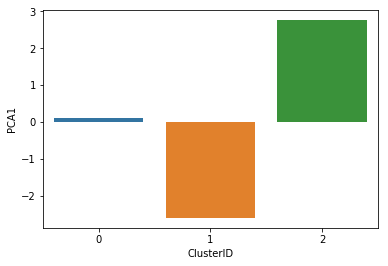

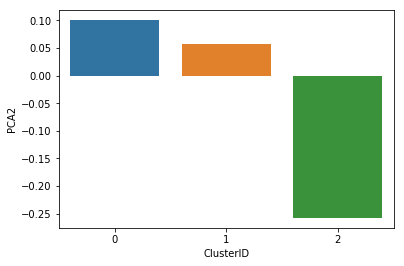

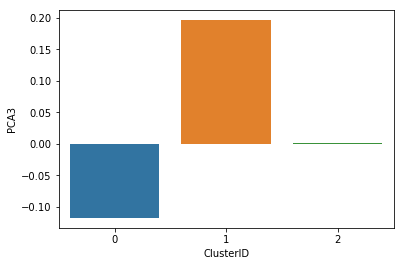

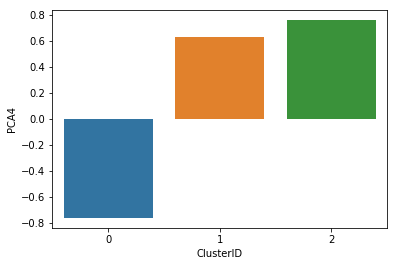

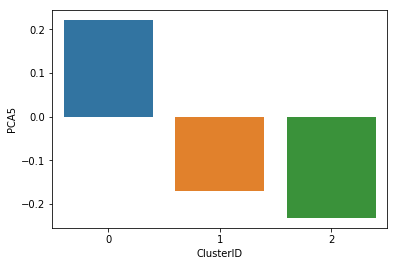

In [114]:
visualize_pc(df_pca_final_km3, 'ClusterID')

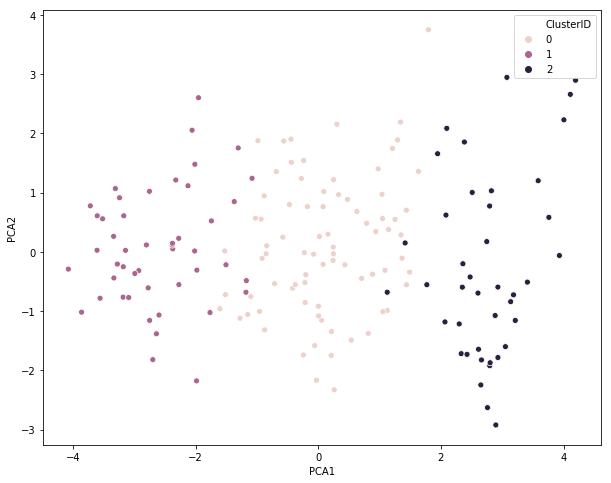

In [115]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="PCA1", y="PCA2", hue="ClusterID", data=df_pca_km3)

| Cluster | PCA 1 | PCA 2 |
|----|---|
| 0 | Low | Mid | 
| 1 | Mid | Low to Mid |
| 2 | High | Low to High |

We can clearly see the clusters formation here.

## Summarizing Original Variables on Clusters

In [116]:
df.index = pd.RangeIndex(len(df.index))
df_km_3 = pd.concat([df, pd.Series(model_clus3.labels_)], axis=1)
df_km_3.columns = ['country', 'child_mort', 'exports%', 'health%', 'imports%', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

km_child_mort = pd.DataFrame(df_km_3.groupby(["ClusterID"]).child_mort.mean())
km_exports_percent = pd.DataFrame(df_km_3.groupby(["ClusterID"])['exports%'].mean())
km_health_percent = pd.DataFrame(df_km_3.groupby(["ClusterID"])['health%'].mean())
km_imports_percent = pd.DataFrame(df_km_3.groupby(["ClusterID"])['imports%'].mean())
km_income = pd.DataFrame(df_km_3.groupby(["ClusterID"]).income.mean())
km_inflation = pd.DataFrame(df_km_3.groupby(["ClusterID"]).inflation.mean())
km_life_expec = pd.DataFrame(df_km_3.groupby(["ClusterID"]).life_expec.mean())
km_total_fer = pd.DataFrame(df_km_3.groupby(["ClusterID"]).total_fer.mean())
km_gdpp = pd.DataFrame(df_km_3.groupby(["ClusterID"]).gdpp.mean())

In [117]:
df_km_3_final = pd.concat([pd.Series([0,1,2]), km_child_mort, km_exports_percent, km_health_percent, km_imports_percent, km_income, km_inflation, km_life_expec, km_total_fer, km_gdpp], axis=1)
df_km_3_final.columns = ["ClusterID", 'child_mort', 'exports%', 'health%', 'imports%', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df_km_3_final

,ClusterID,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp
0,0,22.510127,39.438671,6.314177,47.714873,11198.101266,7.178468,72.546835,2.324177,5771.189873
1,1,91.182979,28.225936,6.253830,41.233317,3738.574468,10.215426,59.777660,4.987819,1808.297872
2,2,5.651220,52.719512,8.331951,47.598171,38988.780488,3.235171,79.514634,1.799756,28969.512195


## Visualizing Clusters on Original Variables

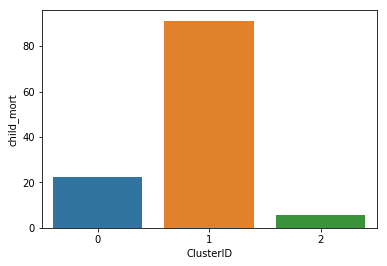

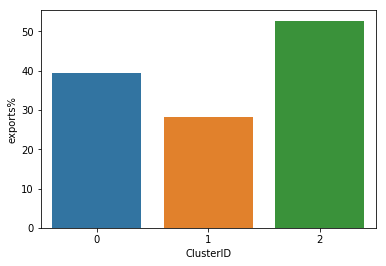

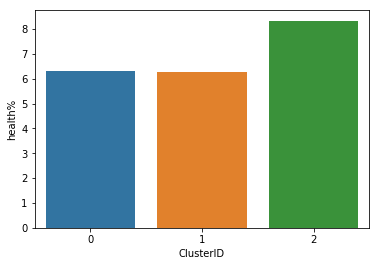

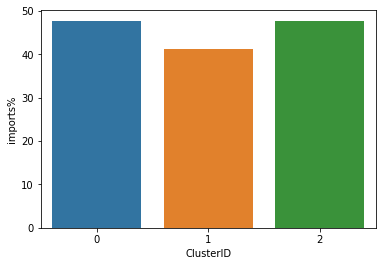

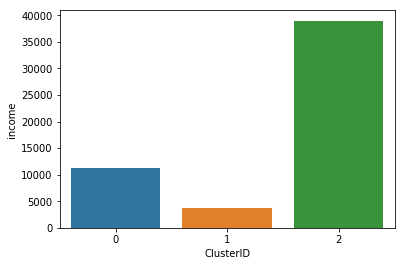

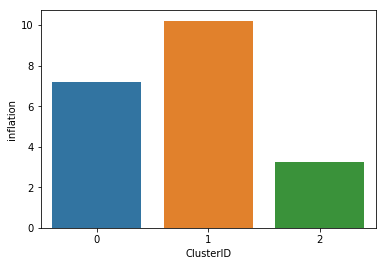

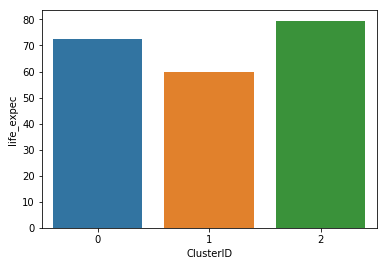

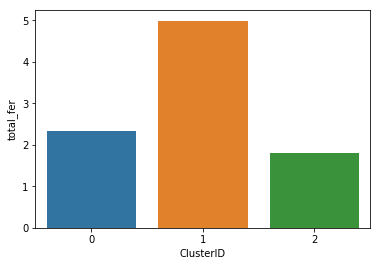

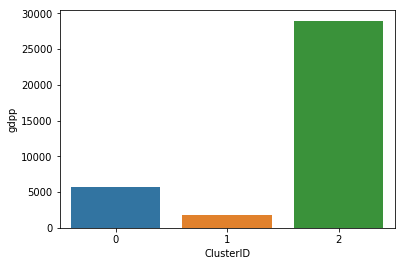

In [118]:
visualize_orig(df_km_3_final, 'ClusterID')

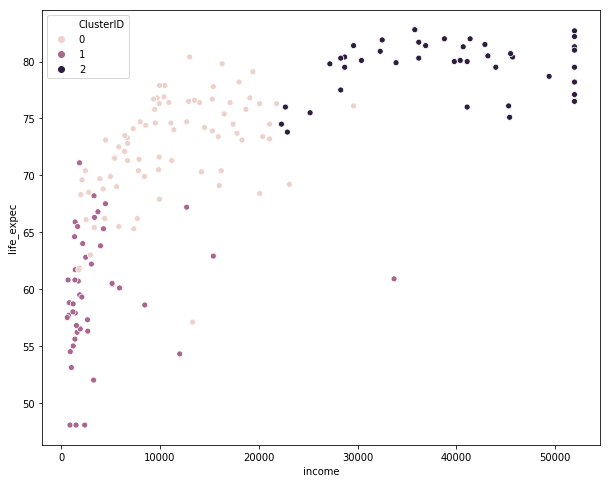

In [119]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="income", y="life_expec", hue="ClusterID", data=df_km_3)

| Cluster | Income Range | Life Expec |
|----|---|
| 0 | Low | Low to Mid |
| 1 | Mid | Mid to High |
| 2 | High | High |

We can clearly see the clusters formation here.

## Intepreting Clusters on Original Variables

In [120]:
col = 'ClusterID'

print('\nFrequency distribution of unique values => \n\n'+ str(df_km_3[col].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

0    79
1    47
2    41
Name: ClusterID, dtype: int64


In [121]:
df_km_3.loc[df_km_3['ClusterID'] == 0]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.000,6.55,48.600,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,38.400,4.17,31.400,12900.0,16.100,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,45.500,6.03,58.900,19100.0,1.440,76.8,2.13,12200.0,0
5,Argentina,14.5,18.900,8.10,16.000,18700.0,20.900,75.8,2.37,10300.0,0
6,Armenia,18.1,20.800,4.40,45.300,6700.0,7.770,73.3,1.69,3220.0,0
9,Azerbaijan,39.2,54.300,5.88,20.700,16000.0,13.800,69.1,1.92,5840.0,0
12,Bangladesh,49.4,16.000,3.52,21.800,2440.0,7.140,70.4,2.33,758.0,0
13,Barbados,14.2,39.500,7.97,48.700,15300.0,0.321,76.7,1.78,16000.0,0
14,Belarus,5.5,51.400,5.61,64.500,16200.0,15.100,70.4,1.49,6030.0,0
16,Belize,18.8,58.200,5.20,57.500,7880.0,1.140,71.4,2.71,4340.0,0


In [122]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_3.loc[df_km_3['ClusterID'] == 0].columns if 
                                df_km_3.loc[df_hc['ClusterID'] == 0][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_3.loc[df_km_3['ClusterID'] == 0][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_3.loc[df_km_3['ClusterID'] == 0][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,62.000,5.50
exports%,92.675,9.58
health%,14.120,2.50
imports%,101.575,11.80
income,29600.000,1780.00
inflation,24.160,-4.21
life_expec,80.400,57.10
total_fer,4.340,1.27
gdpp,16000.000,592.00


In [123]:
df_km_3.loc[df_km_3['ClusterID'] == 1]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553.0,1
3,Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530.0,1
17,Benin,111.000,23.800,4.10,37.2000,1820.0,0.885,61.80,5.3600,758.0,1
25,Burkina Faso,116.000,19.200,6.74,29.6000,1430.0,6.810,57.90,5.8700,575.0,1
26,Burundi,93.600,8.920,11.60,39.2000,764.0,12.300,57.70,6.2600,231.0,1
28,Cameroon,108.000,22.200,5.13,27.0000,2660.0,1.910,57.30,5.1100,1310.0,1
31,Central African Republic,142.875,11.800,3.98,26.5000,888.0,2.010,48.05,5.2100,446.0,1
32,Chad,142.875,36.800,4.53,43.5000,1930.0,6.390,56.50,6.5900,897.0,1
36,Comoros,88.200,16.500,4.51,51.7000,1410.0,3.870,65.90,4.7500,769.0,1
37,"Congo, Dem. Rep.",116.000,41.100,7.91,49.6000,609.0,20.800,57.50,6.5400,334.0,1


In [124]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_3.loc[df_km_3['ClusterID'] == 1].columns if 
                                df_km_3.loc[df_hc['ClusterID'] == 1][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_3.loc[df_km_3['ClusterID'] == 1][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_3.loc[df_km_3['ClusterID'] == 1][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,142.8750,36.9000
exports%,85.8000,0.1090
health%,13.1000,1.9700
imports%,101.0000,0.0659
income,33700.0000,609.0000
inflation,24.1600,0.8850
life_expec,71.1000,48.0500
total_fer,7.0075,2.4100
gdpp,17100.0000,231.0000


In [125]:
df_km_3.loc[df_km_3['ClusterID'] == 2]

,country,child_mort,exports%,health%,imports%,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.800,8.73,20.900,41400.0,1.160,82.0,1.93,33130.0,2
8,Austria,4.3,51.300,11.00,47.800,43200.0,0.873,80.5,1.44,33130.0,2
10,Bahamas,13.8,35.000,7.89,43.700,22900.0,-0.393,73.8,1.86,28000.0,2
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700.0,2
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130.0,2
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130.0,2
29,Canada,5.6,29.100,11.30,31.000,40700.0,2.870,81.3,1.63,33130.0,2
42,Cyprus,3.6,50.200,5.97,57.500,33900.0,2.010,79.9,1.42,30800.0,2
43,Czech Republic,3.4,66.000,7.88,62.900,28300.0,-1.430,77.5,1.51,19800.0,2
44,Denmark,4.1,50.500,11.40,43.600,44000.0,3.220,79.5,1.87,33130.0,2


In [126]:
# Check if all the values of a variable are in the same scale

numeric_cols = [cname for cname in df_km_3.loc[df_km_3['ClusterID'] == 2].columns if 
                                df_km_3.loc[df_hc['ClusterID'] == 2][cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df_km_3.loc[df_km_3['ClusterID'] == 2][numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df_km_3.loc[df_km_3['ClusterID'] == 2][numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

,Max,Min
child_mort,15.700,2.60
exports%,92.675,12.40
health%,14.120,1.81
imports%,101.575,13.60
income,51967.500,22300.00
inflation,17.200,-3.22
life_expec,82.800,73.80
total_fer,3.030,1.15
gdpp,33130.000,13100.00


## Clusters & Countries

In [127]:
df_km_3.loc[(df_km_3['ClusterID'] == 0)].country

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48          

In [128]:
df_km_3.loc[(df_km_3['ClusterID'] == 1)].country

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107     

In [129]:
df_km_3.loc[(df_km_3['ClusterID'] == 2)].country

7                 Australia
8                   Austria
10                  Bahamas
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
51                  Estonia
53                  Finland
54                   France
58                  Germany
60                   Greece
67                  Hungary
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
128            Saudi Arabia
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                 

# Verdict

As we can clearly see, K = 3 yields better results compared to K = 6. Below is the list of countries that HELP should focus on for providing the aid as these have less income and low to medium life expectancy which are one of the important health and socio-economic factors that need to be considered.

|Countries|
|----|
| Afghanistan |
| Angola |
| Benin |
| Burkina Faso |
| Burundi |
| Cameroon |
| Central African Republic |
| Chad |
| Comoros |
| Congo, Dem. Rep. |
| Congo, Rep. |
| Cote d'Ivoire |
| Equatorial Guinea |
| Eritrea |
| Gabon |
| Gambia |
| Ghana |
| Guinea |
| Guinea-Bissau |
| Haiti |
| Iraq |
| Kenya |
| Kiribati |
| Lao |
| Lesotho |
| Liberia |
| Madagascar |
| Malawi |
| Mali |
| Mauritania |
| Mozambique |
| Myanmar |
| Namibia |
| Niger |
| Nigeria |
| Pakistan |
| Rwanda |
| Senegal |
| Sierra Leone |
| South Africa |
| Sudan |
| Tanzania |
| Timor-Leste |
| Togo |
| Uganda |
| Yemen |
| Zambia |